In [1]:
#Analisis de transectas

import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
path = r'/Users/claudia/Documents/CoastSat-master/data/MogotesTodo2010a2020'

df = pd.read_csv(path + r'/transect_time_series_tidally_corrected.csv', header=0, names=['dates','t1','t2','t3','t4','t5'])

df.head()

,dates,t1,t2,t3,t4,t5
0,2014-03-08 13:33:38+00:00,206.651612,229.613750,269.340123,216.407419,116.326108
1,2014-11-26 13:39:26+00:00,189.698313,207.000106,268.082698,219.649400,99.235172
2,2014-12-28 13:39:18+00:00,200.199540,214.929588,266.878473,224.146706,99.958795
3,2015-01-06 13:33:07+00:00,183.303549,206.383335,264.216027,220.806282,98.906971
4,2015-01-06 13:33:31+00:00,185.126291,207.480802,264.755140,221.735768,99.922585


In [4]:
dates = df['dates']
df.index = pd.to_datetime(dates)

t1 = df['t1'] - np.nanmedian(df['t1'])

df['t1-corregida'] = t1 

df.index

DatetimeIndex(['2014-03-08 13:33:38+00:00', '2014-11-26 13:39:26+00:00',
               '2014-12-28 13:39:18+00:00', '2015-01-06 13:33:07+00:00',
               '2015-01-06 13:33:31+00:00', '2015-05-30 13:32:09+00:00',
               '2015-07-01 13:32:51+00:00', '2015-08-18 13:32:48+00:00',
               '2015-11-22 13:33:13+00:00', '2015-11-22 13:33:37+00:00',
               ...
               '2020-06-12 13:32:41+00:00', '2020-06-12 13:33:05+00:00',
               '2020-06-14 13:53:19+00:00', '2020-07-09 13:53:15+00:00',
               '2020-07-29 13:53:16+00:00', '2020-08-03 13:53:19+00:00',
               '2020-08-23 13:53:18+00:00', '2020-08-28 13:53:16+00:00',
               '2020-09-07 13:53:16+00:00', '2020-09-12 13:53:17+00:00'],
              dtype='datetime64[ns, UTC]', name='dates', length=107, freq=None)

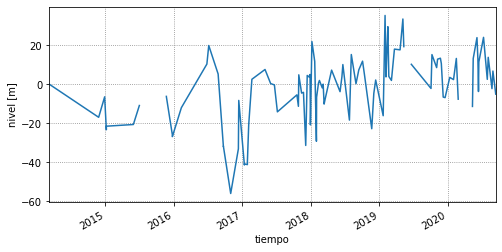

In [5]:
fig = plt.figure(figsize=(8,4))
ax = plt.axes()
df['t1-corregida'].plot(ax=ax)
ax.set(xlabel="tiempo", ylabel="nivel [m]")
ax.grid(color='grey',linestyle=':')


In [6]:
df = df.dropna(how='any')

X = df.index - df.index[0]
print(X)

TimedeltaIndex([   '0 days 00:00:00',  '263 days 00:05:48',
                 '295 days 00:05:40',  '303 days 23:59:29',
                 '303 days 23:59:53',  '447 days 23:58:31',
                 '479 days 23:59:13',  '623 days 23:59:35',
                 '623 days 23:59:59',  '655 days 23:59:34',
                ...
                '2287 days 23:59:03', '2287 days 23:59:27',
                '2290 days 00:19:41', '2315 days 00:19:37',
                '2335 days 00:19:38', '2340 days 00:19:41',
                '2360 days 00:19:40', '2365 days 00:19:38',
                '2375 days 00:19:38', '2380 days 00:19:39'],
               dtype='timedelta64[ns]', name='dates', length=102, freq=None)


In [7]:
#regresion lineal

Xdays = np.asarray(X.days.tolist()).reshape(-1,1)
y = df['t1-corregida'].values

regr = linear_model.LinearRegression()
regr.fit(Xdays, y)

# Make predictions using the testing set
y_pred = regr.predict(Xdays)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, y_pred))

Coefficients: 
 [0.01479123]
Mean squared error: 224.73
Coefficient of determination: 0.24


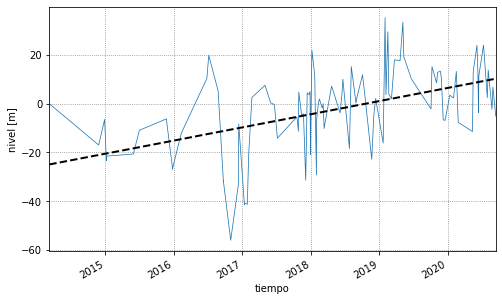

In [8]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes()
df['t1-corregida'].plot(ax=ax, linewidth=0.75)
ax.set(xlabel="tiempo", ylabel="nivel [m]")
ax.grid(color='grey', linestyle=':')
ax.plot(df.index, y_pred, color='black', linewidth=2, linestyle='--')
fig.savefig(path + '/prueba_regresion.png')